# Polynomial Regression

## Learning Objectives
- Understand the motivation for polynomial regression.
- Learn how polynomial regression extends linear regression.
- Implement polynomial regression in Python using scikit-learn.
- Compare model performance with linear regression.

---

## 1. What is Polynomial Regression?
- **Linear regression** models a straight-line relationship between predictors and target.
- **Polynomial regression** allows for curved relationships by adding polynomial terms of the features.

Equation (degree 2 example):

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \epsilon
$$

- Higher-degree polynomials can capture more complex patterns.
- Risk: **overfitting** if degree is too high.

---


In [18]:
# 2. Generate a nonlinear dataset

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Nonlinear relationship
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 0.5 * X.flatten()**3 - X.flatten()**2 + 2*X.flatten() + np.random.randn(100) * 3

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=46)

## 3. Fit Linear Regression
We start with a simple linear regression model.


In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr_test = lr.predict(X_test)
y_pred_lr_train = lr.predict(X_train)

# r2 score
print('R2 Score (Test):', r2_score(y_test, y_pred_lr_test))
print('R2 Score (Train):', r2_score(y_train, y_pred_lr_train))

# rmse
print('RMSE (Test):', np.sqrt(mean_squared_error(y_test, y_pred_lr_test)))
print('RMSE (Train):', np.sqrt(mean_squared_error(y_train, y_pred_lr_train)))

R2 Score (Test): 0.7854091720363017
R2 Score (Train): 0.8297531344957167
RMSE (Test): 4.146813044976041
RMSE (Train): 3.908388595581845


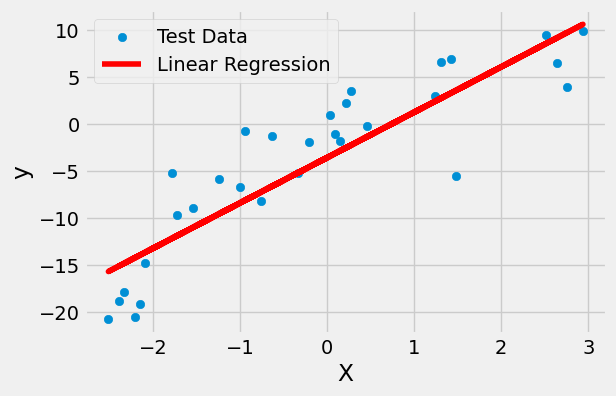

In [20]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(6, 4))
    plt.scatter(X_test, y_test, label='Test Data')
    plt.plot(X_test, y_pred_lr_test, color='red', label='Linear Regression')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

## 4. Fit Polynomial Regression
We add polynomial features (degree 2) to capture the nonlinear relationship.


In [21]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

y_pred_poly_test = lr_poly.predict(X_test_poly)
y_pred_poly_train = lr_poly.predict(X_train_poly)

# r2 score
print('R2 Score (Test):', r2_score(y_test, y_pred_poly_test))
print('R2 Score (Train):', r2_score(y_train, y_pred_poly_train))

# rmse
print('RMSE (Test):', np.sqrt(mean_squared_error(y_test, y_pred_poly_test)))
print('RMSE (Train):', np.sqrt(mean_squared_error(y_train, y_pred_poly_train)))

R2 Score (Test): 0.8614288172976203
R2 Score (Train): 0.9059153448325667
RMSE (Test): 3.3323095686692827
RMSE (Train): 2.905477882544783


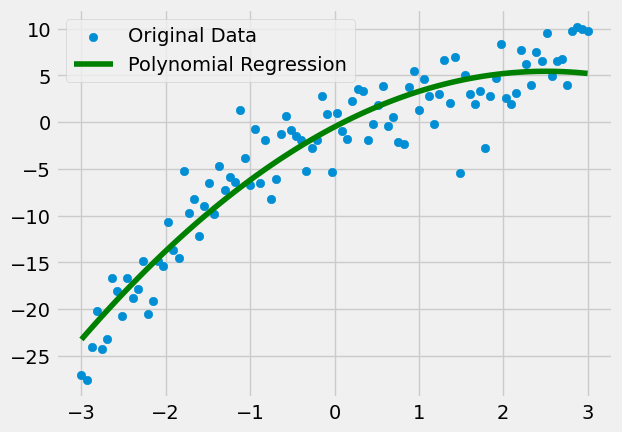

In [31]:
with plt.style.context('fivethirtyeight'):
  x_vals = np.linspace(X.min(), X.max(), 100)
  x_vals_poly = poly.transform(x_vals.reshape(-1, 1))
  y_vals_poly = lr_poly.predict(x_vals_poly)
  plt.scatter(X, y, label='Original Data')
  plt.plot(x_vals, y_vals_poly, color='green', label='Polynomial Regression')
  plt.legend()
